<a href="https://colab.research.google.com/github/Chinemelu4/Customer-Prediction/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TO seethe execution time

In [ ]:
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 3.88 s (started: 2021-07-22 20:06:33 +00:00)


In [ ]:
#scrap for my images

time: 459 µs (started: 2021-07-22 20:06:42 +00:00)


In [1]:
!pip install bing-image-downloader

In [ ]:
#create an image directory

time: 597 µs (started: 2021-07-22 20:06:52 +00:00)


In [2]:
!mkdir images

In [3]:
from bing_image_downloader import downloader
downloader.download("sunflower",limit=40, output_dir='images',
                    adult_filter_off=True)

[%] Downloading Images to /content/images/sunflower


[!!]Indexing page: 1

[%] Indexed 40 Images on Page 1.


[%] Downloading Image #1 from https://upload.wikimedia.org/wikipedia/commons/thumb/4/40/Sunflower_sky_backdrop.jpg/1200px-Sunflower_sky_backdrop.jpg
[Error]Invalid image, not saving https://upload.wikimedia.org/wikipedia/commons/thumb/4/40/Sunflower_sky_backdrop.jpg/1200px-Sunflower_sky_backdrop.jpg

[!] Issue getting: https://upload.wikimedia.org/wikipedia/commons/thumb/4/40/Sunflower_sky_backdrop.jpg/1200px-Sunflower_sky_backdrop.jpg
[!] Error:: Invalid image, not saving https://upload.wikimedia.org/wikipedia/commons/thumb/4/40/Sunflower_sky_backdrop.jpg/1200px-Sunflower_sky_backdrop.jpg

[%] Downloading Image #1 from https://content.thriveglobal.in/wp-content/uploads/sites/3/2019/12/sunflower-field-3620919_1920.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.myweekly.co.uk/wp-content/uploads/sites/9/2019/04/iStock-912760592-sunflower-x.jpg
[%] File Down

In [4]:
downloader.download("rugby ball leather",limit=40, output_dir='images',
                    adult_filter_off=True)

[%] Downloading Images to /content/images/rugby ball leather


[!!]Indexing page: 1

[%] Indexed 40 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/originals/36/ac/18/36ac18ae71247bc1ae374fddb2b878a7.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.ebayimg.com/images/g/dNcAAOSwfcVUJXts/s-l400.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://sportantiques.co.uk/pub/media/catalog/product/2/5/sportantiques-small-967051981234.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.ebayimg.com/images/g/uVQAAOSw-JtcYKg6/s-l400.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i.ebayimg.com/images/g/jjoAAOSwnY1dse~n/s-l400.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i.ebayimg.com/images/g/4bcAAOSwTXdciFwx/s-l400.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://i.ebayimg.com/images/g/EKgAAOSw8dVe7~ro/s-l400.jpg
[%] File Downloaded !

[%] Downloading Image #8 from https://i.pi

In [5]:
downloader.download("ice cream cone",limit=40, output_dir='images',
                    adult_filter_off=True)

[%] Downloading Images to /content/images/ice cream cone


[!!]Indexing page: 1

[%] Indexed 40 Images on Page 1.


[%] Downloading Image #1 from http://graphics8.nytimes.com/images/2013/06/02/magazine/02wmt/02wmt-superJumbo-v3.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://americacomesalive.com/i/ice-cream-cone.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.thespruceeats.com/thmb/3zSpyarxfOBVAZS3CNJYOBGk26s=/3000x1687/smart/filters:no_upscale()/IceCreamConeCupcakesHERO-ef1da5f5b4be42129e420ad1b8088b9b.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://www.koshericecream.com/wp-content/uploads/magictoolbox_cache/640ca855e591fa5c6759d336b1ca786b/original/2118662499/41404-24-Pk-Nutty-Cone-D-UPC-0-91404-21150-5.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://img1.southernliving.timeinc.net/sites/default/files/styles/4_3_horizontal_-_1200x900/public/image/2017/07/main/ice-cream-cones.jpg?itok=9I9Q7gKA
[%] File Downloaded

In [41]:
# To carry out pre proccessing impo

In [42]:
import os 
import matplotlib.pyplot as plt
import numpy as np
#to read image
from skimage.io import imread
#to resize image to uniform sizes
from skimage.transform import resize

target=[]
images=[]
flat_data=[]

DATADIR='/content/images'
CATEGORIES=['sunflower','rugby ball leather','ice cream cone']

In [43]:
for category in CATEGORIES:
  class_num=CATEGORIES.index(category)   #use the index to create a label encoding
  path=os.path.join(DATADIR,category)  #create a path for the images
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img)) 
    #-print(img_array.shape) #to show the shape of each image (length,width,RGB_code)
    #-plt.imshow(img_array)  #to show an eexample of how an image looks like


    img_resized=resize(img_array,(150,150,3))  #to resize the image
    flat_data.append(img_resized.flatten())    #to flatten image and append to empty list
    images.append(img_resized)
    target.append(class_num)

flat_data=np.array(flat_data)
target=np.array(target)
images=np.array(images)

In [44]:
flat_data.shape

(120, 67500)

In [45]:
#split our data into train and test sets

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.3,
                                random_state=109)

In [47]:
#i will use support vector machine to classifier my data

In [48]:
from sklearn.model_selection import GridSearchCV  #this is to help me tweek my parameters 
from sklearn import svm

In [49]:
param_grid=[
            {'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
]
svc=svm.SVC(probability=True)  #to make sure our model gives us the percentage of probability
clf= GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [50]:
#check our predicted and actual to see the accuracy

In [51]:
y_pred=clf.predict(x_test)
y_pred

array([0, 2, 2, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 2, 0, 0, 1, 0, 2, 1, 2,
       2, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0])

In [52]:
y_test

array([0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 1, 1,
       2, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 2, 2, 0])

In [53]:
#use the sklearn library to check for accuracy

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [55]:
accuracy_score(y_pred,y_test)

0.75

In [56]:
confusion_matrix(y_pred,y_test)

array([[12,  0,  2],
       [ 0,  6,  5],
       [ 0,  2,  9]])

In [57]:
#lets check with real time image

In [58]:
# i will save the model using pickle

In [59]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [60]:
model=pickle.load(open('img_model.p','rb'))

In [61]:
#test with a new image

In [71]:
flat_data=[]
url=input('Enter your URL')  #url from where input picture is gotten

Enter your URLhttps://media.istockphoto.com/photos/rugby-ball-picture-id184958484


(683, 1024, 3)
 PREDICTED OUTPUT: rugby ball leather


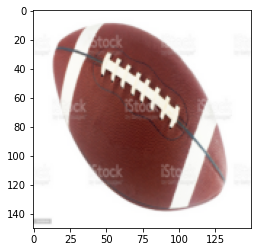

In [72]:

img=imread(url)
img_resized=resize(img,(150,150,3))   #resize image to our set size
flat_data.append(img_resized.flatten())   #flatten image 
flat_data=np.array(flat_data)    #convert to a vector
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')

In [64]:
!pip install streamlit
!pip install pyngrok


In [ ]:
#I want to deploy this to the web

In [74]:
from pyngrok import ngrok


In [75]:
%%writefile app.py 
import streamlit as st
import numpy as np
#to read image
from skimage.io import imread
#to resize image to uniform sizes
from skimage.transform import resize
import pickle
from PIL import Image
st.title('Image Classifier Test ')
st.text('upload the image')

model=pickle.load(open('img_model.p','rb'))

uploaded_file=st.file_uploader("choose an image....", type="jpg")
if uploaded_file is not None:
  img= Image.open(uploaded_file)
  st.image(img,caption='Uploaded Image')

  if st.button('PREDICT'):

    st.write('Result...') 
    CATEGORIES=['sunflower','rugby ball leather','ice cream cone']
    flat_data=[]
    img=np.array(img)
    img_resized=resize(img,(150,150,3))   #resize image to our set size
    flat_data.append(img_resized.flatten())   #flatten image 
    flat_data=np.array(flat_data)    #convert to a vector 
  
    y_out=model.predict(flat_data)
    y_out=CATEGORIES[y_out[0]]
    st.write(f' PREDICTED OUTPUT: {y_out}')

Overwriting app.py


In [76]:
url=ngrok.connect(port='8501')
url


<NgrokTunnel: "http://44fe5c1e62f3.ngrok.io" -> "http://localhost:80">

In [ ]:
!nohup streamlit run --server.port 80 app.py &>/dev/null


In [ ]:
http://44fe5c1e62f3.ngrok.io